<a href="https://colab.research.google.com/github/bhushanmandava/Time-Series/blob/main/holt_winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
df = pd.read_csv("weekly_customer_complaints.csv", index_col="week", parse_dates=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   complaints               261 non-null    object
 1   discount_rate            261 non-null    object
 2   small_commercial_event   261 non-null    int64 
 3   medium_commercial_event  261 non-null    int64 
 4   big_commercial_event     261 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.2+ KB


In [8]:
df['complaints'] = df['complaints'].str.replace(",", "").astype(int)


<Axes: xlabel='week'>

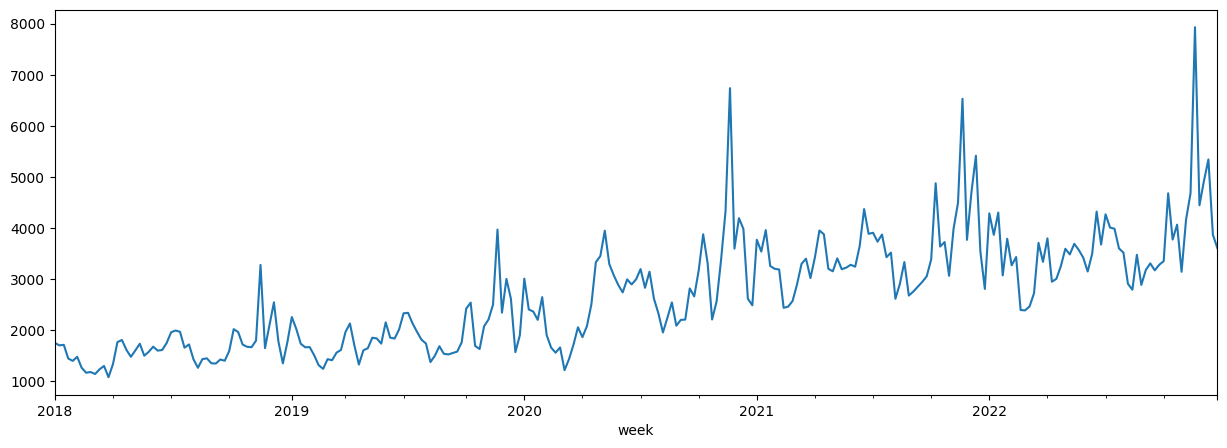

In [9]:
df['complaints'].plot(figsize=(15,5))

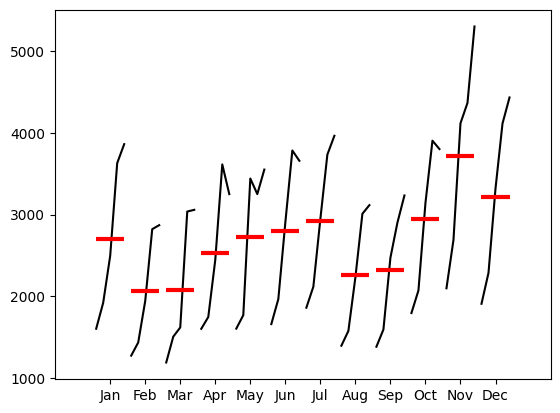

In [11]:
#montly plot
month_plot(df['complaints'].resample('ME').mean())
plt.show()

<ipython-input-13-5cba49a66c1f>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['complaints'].resample('Q').mean())


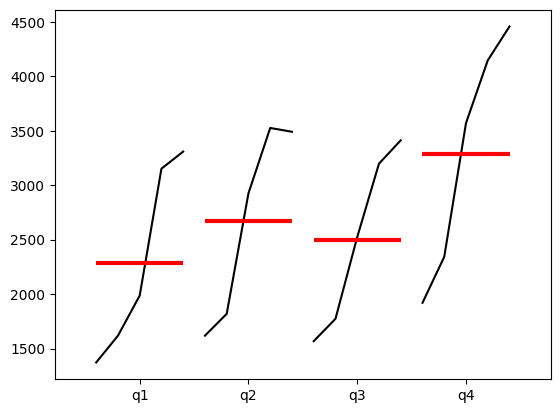

In [13]:
quarter_plot(df['complaints'].resample('Q').mean())
plt.show()

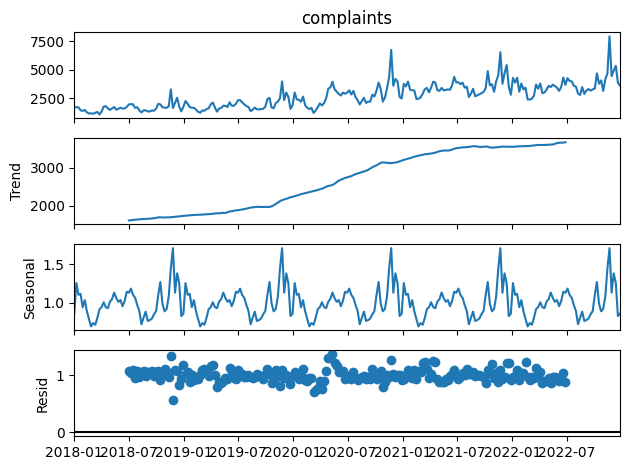

In [17]:
#seasonal decomposition
result = seasonal_decompose(df['complaints'], model='multiplicative', period=52)
result.plot().show()

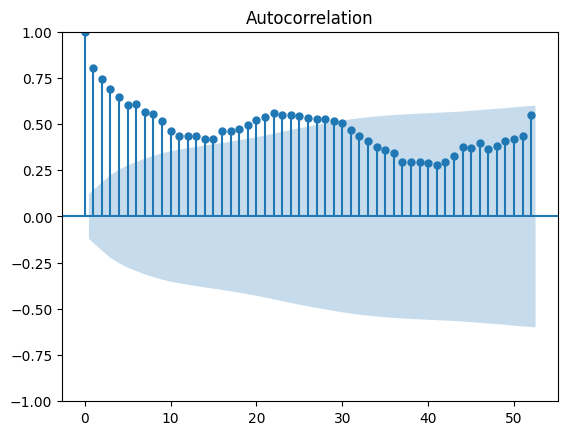

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['complaints'], lags=52)
plt.show()

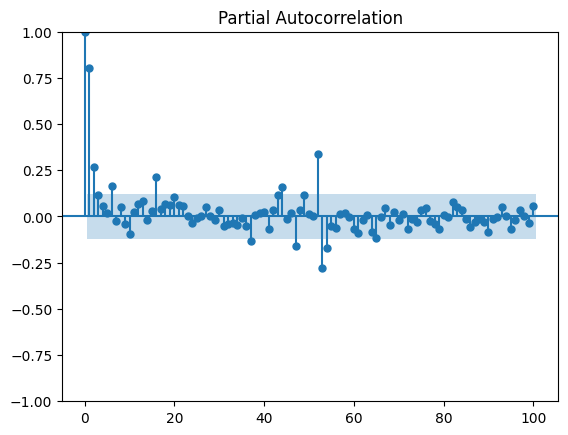

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['complaints'],lags=100)
plt.show()

In [24]:
#train test split based on the period we want to predict
period =13
train = df.iloc[:-period]
test = df.iloc[-period:]

In [26]:
train.tail()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2022-08-29,2885,31.45%,0,0,0
2022-09-05,3177,31.30%,0,0,0
2022-09-12,3306,28.21%,1,0,0
2022-09-19,3170,27.76%,0,0,0
2022-09-26,3279,28.50%,0,0,0


In [27]:
test.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2022-10-03,3350,29.78%,0,0,0
2022-10-10,4679,31.62%,0,1,0
2022-10-17,3773,32.37%,0,0,0
2022-10-24,4065,32.95%,0,1,0
2022-10-31,3142,32.64%,0,0,0


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing
ses = SimpleExpSmoothing(train['complaints']).fit()
print(ses.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:             complaints   No. Observations:                  248
Model:             SimpleExpSmoothing   SSE                       74355648.448
Optimized:                       True   AIC                           3131.513
Trend:                           None   BIC                           3138.540
Seasonal:                        None   AICC                          3131.678
Seasonal Periods:                None   Date:                 Wed, 23 Apr 2025
Box-Cox:                        False   Time:                         13:50:16
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5115116                alpha                 True
initial_level              1750.0000                

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [30]:
ses_pred = ses.forecast(period)
ses_pred

,0
2022-10-03,3236.834414
2022-10-10,3236.834414
2022-10-17,3236.834414
2022-10-24,3236.834414
2022-10-31,3236.834414
2022-11-07,3236.834414
2022-11-14,3236.834414
2022-11-21,3236.834414
2022-11-28,3236.834414
2022-12-05,3236.834414


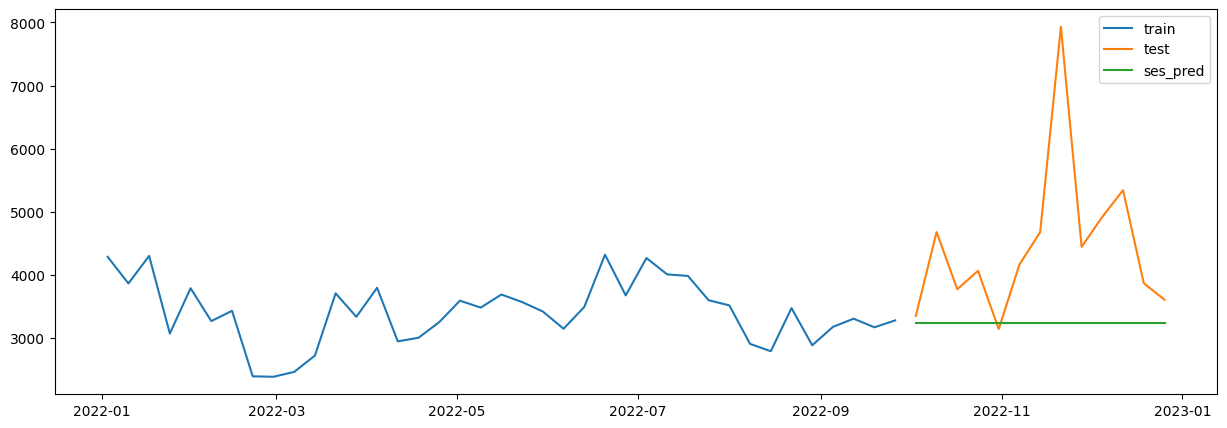

In [32]:
plt.figure(figsize=(15,5))
plt.plot(train['complaints'].loc['2022'], label='train')
plt.plot(test['complaints'], label='test')
plt.plot(ses_pred, label='ses_pred')
plt.legend()
plt.show()

In [33]:
d_es =ExponentialSmoothing(train['complaints'], trend='add').fit()
print(d_es.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               complaints   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       75700147.619
Optimized:                         True   AIC                           3139.958
Trend:                         Additive   BIC                           3154.011
Seasonal:                          None   AICC                          3140.306
Seasonal Periods:                  None   Date:                 Wed, 23 Apr 2025
Box-Cox:                          False   Time:                         13:54:35
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5212797                alpha                 True
smoothing_trend            0.01902

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


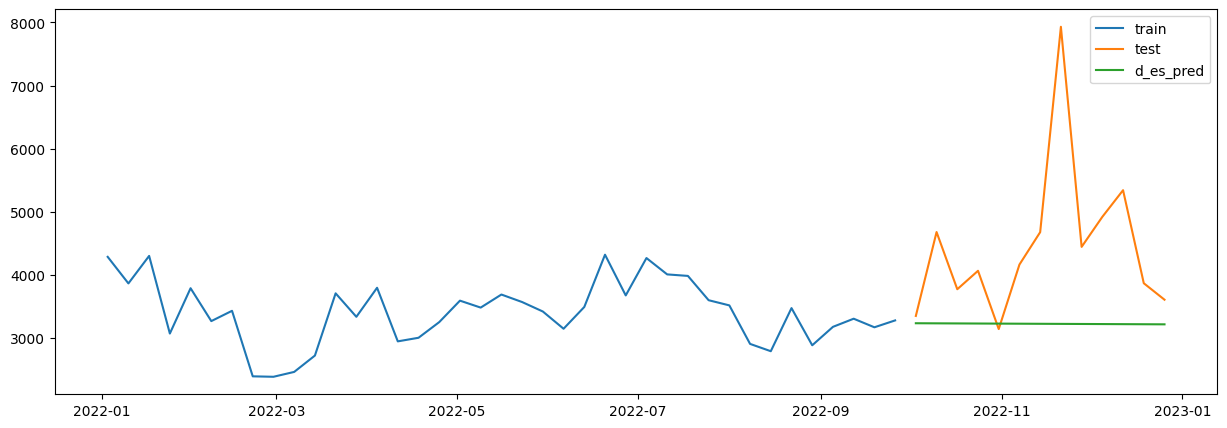

In [34]:
plt.figure(figsize=(15,5))
plt.plot(train['complaints'].loc['2022'], label='train')
plt.plot(test['complaints'], label='test')
plt.plot(d_es.forecast(period), label='d_es_pred')
plt.legend()
plt.show()

In [35]:
#hlot_winters
model_holt = ExponentialSmoothing(train['complaints'], trend='add', seasonal='mul', seasonal_periods=52).fit()
print(model_holt.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               complaints   No. Observations:                  248
Model:             ExponentialSmoothing   SSE                       22025740.634
Optimized:                         True   AIC                           2937.785
Trend:                         Additive   BIC                           3134.537
Seasonal:                Multiplicative   AICC                          2973.996
Seasonal Periods:                    52   Date:                 Wed, 23 Apr 2025
Box-Cox:                          False   Time:                         13:56:55
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2171429                alpha                 True
smoothing_trend          

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


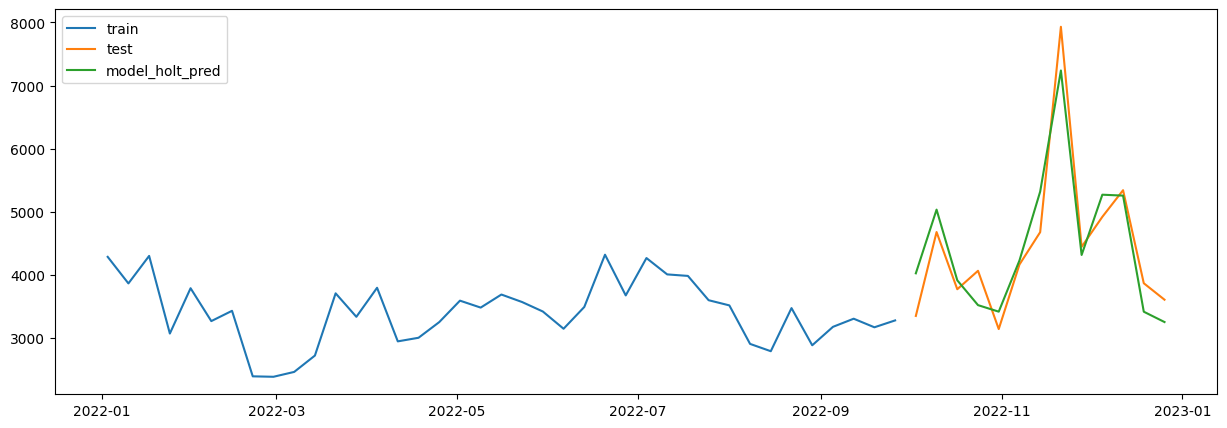

In [36]:
plt.figure(figsize=(15,5))
plt.plot(train['complaints'].loc['2022'], label='train')
plt.plot(test['complaints'], label='test')
plt.plot(model_holt.forecast(period), label='model_holt_pred')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
rmse = root_mean_squared_error(test['complaints'],model_holt.forecast(period))
print(rmse)
mean_absolute_error(test['complaints'],model_holt.forecast(period))
mean_absolute_percentage_error(test['complaints'],model_holt.forecast(period))


424.8335103514638


0.08518159138874437